In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datmin-joints-2020/sample_submission.csv
/kaggle/input/datmin-joints-2020/test_data.csv
/kaggle/input/datmin-joints-2020/train_data.csv


In [ ]:
train_df = pd.read_csv("../input/datmin-joints-2020/train_data.csv")
test_df = pd.read_csv("../input/datmin-joints-2020/test_data.csv")

In [ ]:
train_df.describe()

,id,word-2,word-3,word-4,word-6,word-7,word-12,word-15,word-16,word-20,...,word-23,word-25,word-26,word-29,word-31,word-32,word-34,word-36,word-37,Result
count,3620.000000,3604.000000,3606.000000,3597.000000,3597.000000,3600.000000,3600.000000,3596.000000,3609.000000,3606.000000,...,3605.000000,3603.000000,3607.000000,3604.000000,3609.000000,3610.000000,3609.000000,3607.000000,3606.000000,3620.000000
mean,1810.500000,1.752775,1.298392,1.926606,3.046150,1.410000,1.290278,9.063404,1.435578,1.513034,...,5.324827,5.262559,1.068755,10.971976,1.319202,1.772853,1.372125,37.739950,3.247920,0.288950
std,1045.148315,3.751389,2.766599,4.131414,6.061796,2.590879,2.742220,14.611916,2.667310,4.364428,...,9.020088,8.098156,3.071660,18.276807,3.386842,3.400314,2.794576,2163.622051,6.087762,0.453337
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,905.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1810.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,2.000000,3.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2715.250000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,10.000000,2.000000,2.000000,...,6.000000,6.000000,1.000000,12.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000
max,3620.000000,81.000000,66.000000,117.000000,89.000000,31.000000,56.000000,275.000000,39.000000,123.000000,...,111.000000,108.000000,39.000000,302.000000,57.000000,66.000000,33.000000,129945.000000,108.000000,1.000000


In [ ]:
train_df.groupby("Result").describe()

id                                                          \
         count         mean          std  min     25%     50%      75%   
Result                                                                   
0       2574.0  1824.016317  1040.208870  1.0  927.25  1832.0  2729.75   
1       1046.0  1777.239006  1056.969661  5.0  871.25  1745.5  2662.75   

                word-2            ... word-36           word-37            \
           max   count      mean  ...     75%       max   count      mean   
Result                            ...                                       
0       3620.0  2564.0  1.304212  ...     2.0  129945.0  2564.0  2.409906   
1       3616.0  1040.0  2.858654  ...     3.0      67.0  1042.0  5.309981   

                                             
             std  min  25%  50%  75%    max  
Result                                       
0       4.543465  0.0  0.0  1.0  3.0   59.0  
1       8.457663  0.0  1.0  2.0  6.0  108.0  

[2 rows x 160 columns]

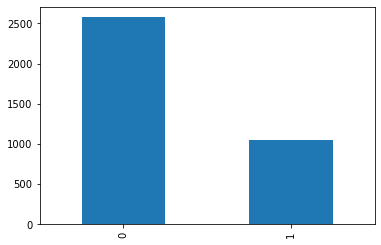

In [ ]:
train_df.Result.value_counts().plot.bar();

In [ ]:
train_df['zee'] = 'train'
test_df['zee'] = 'test'

combined_df = pd.concat((train_df, test_df))

combined_df = combined_df.sort_values('id').reset_index(drop=True)
combined_df = combined_df.set_index('id')

combined_df.sample(8, random_state=1)

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,...,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result,zee
id,,,,,,,,,,,,,,,,,,,,,
2409,1,0.0,0.0,0.0,0,0.0,0.0,0,0,0,...,0,0.0,0,1.0,1.0,0,1,1,0.0,train
2731,18,2.0,0.0,0.0,3,0.0,0.0,2,2,2,...,2,1.0,0,0.0,2.0,5,0,1,0.0,train
2937,16,2.0,1.0,1.0,0,0.0,0.0,NaN,2,NaN,...,0,0.0,1,0.0,0.0,0,0,0,1.0,train
848,69,1.0,2.0,2.0,14,5.0,0.0,11,9,7,...,4,2.0,11,2.0,7.0,8,1,9,0.0,train
1786,26,2.0,0.0,0.0,4,2.0,1.0,8,1,1,...,9,NaN,2,1.0,2.0,1,2,3,0.0,train
2242,23,0.0,1.0,0.0,7,4.0,1.0,1,3,2,...,7,0.0,4,2.0,0.0,2,3,2,0.0,train
3265,4,0.0,0.0,0.0,0,0.0,0.0,0,0,0,...,0,0.0,0,1.0,0.0,0,0,0,0.0,train
2052,6,0.0,0.0,0.0,0,0.0,0.0,1,1,0,...,0,0.0,0,0.0,0.0,0,0,0,0.0,train


In [ ]:
import re

def clean_numeric(df):
    for col in df.columns:
        for cell in df[col]:
            try:
                float(cell)
            except:
                if (all(c.isdecimal() == False for c in cell)):
                    df[col].loc[(df[col] == cell)] = np.nan
                    print(col, cell, "alpha")
                else:
                    if (cell == "4+F2185"):
                        df[col].loc[(df[col] == cell)] = np.nan
                        print(col, cell, "special case")
                    else:
                        df[col].loc[(df[col] == cell)] = int(re.sub("\D", "", cell))
                        print(col, cell, "num---convert:", re.sub("\D", "", cell))

In [ ]:
check = combined_df[combined_df.columns[~combined_df.columns.isin(['zee','result'])]]
clean_numeric(check)

word-1 a alpha
word-5 4+F2185 special case
word-5 11h num---convert: 11
word-5 a alpha
word-8 a alpha
word-8 `16 num---convert: 16
word-9 ` alpha
word-9 `29 num---convert: 29
word-10 `10 num---convert: 10
word-11 \ alpha
word-13 a alpha
word-13 `27 num---convert: 27
word-14 `3 num---convert: 3
word-17 `4 num---convert: 4
word-17 a alpha
word-18 a alpha
word-18 \ alpha
word-19 `155 num---convert: 155
word-19 `363 num---convert: 363
word-19 `361 num---convert: 361
word-19 `51 num---convert: 51
word-19 `764 num---convert: 764
word-19 `61 num---convert: 61
word-19 `84 num---convert: 84
word-22 `11 num---convert: 11
word-22 `21 num---convert: 21
word-24 `2 num---convert: 2
word-27 `2 num---convert: 2
word-27 [ alpha
word-28 a alpha
word-30 a alpha
word-33 `18 num---convert: 18
word-33 `10 num---convert: 10
word-33 a alpha
word-35 `3 num---convert: 3
word-38 `10 num---convert: 10
word-39 `1 num---convert: 1
word-40 a alpha


In [ ]:
check[(check.astype('float') < 0).any(1)]

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
id,,,,,,,,,,,,,,,,,,,,,
25,60,2.0,3.0,3.0,9,6.0,2.0,10,6,4,...,2.0,21,0.0,6,1.0,4.0,3,4,0,0.0
33,14,0.0,0.0,-1.0,0,0.0,0.0,0,3,1,...,0.0,0,0.0,2,0.0,0.0,1,0,0,0.0


In [ ]:
check[check.columns[check.dtypes != np.object]] = check[check.columns[check.dtypes != np.object]].abs()

In [ ]:
check['nan'] = check.apply(lambda x: len(check.columns)-x.count(), axis=1)
check['words'] = check.sum(axis=1)
check.sample(8)

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,...,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result,nan,words
id,,,,,,,,,,,,,,,,,,,,,
3508,132,2.0,4.0,1.0,36,15.0,1.0,17,24,4,...,3.0,10,11.0,16.0,10,4,0,0.0,0,146.0
2006,6,0.0,0.0,0.0,1,0.0,0.0,0,3,0,...,0.0,0,0.0,0.0,0,3,1,0.0,1,6.0
2781,4,0.0,1.0,0.0,0,0.0,0.0,0,0,1,...,0.0,1,0.0,0.0,0,0,0,1.0,0,8.0
517,40,2.0,0.0,1.0,10,3.0,1.0,2,2,1,...,1.0,1,0.0,2.0,0,1,7,1.0,0,40.0
1451,2,0.0,0.0,0.0,0,0.0,0.0,0,0,0,...,0.0,2,0.0,1.0,0,0,1,1.0,0,4.0
4496,73,1.0,4.0,4.0,18,NaN,1.0,14,3,4,...,2.0,6,2.0,7.0,3,6,1,NaN,2,66.0
1598,13,0.0,0.0,1.0,1,0.0,0.0,2,1,2,...,0.0,1,0.0,1.0,0,2,0,0.0,0,8.0
3902,28,2.0,2.0,0.0,7,2.0,1.0,5,3,3,...,0.0,0,0.0,1.0,1,1,2,NaN,1,34.0


In [ ]:
clean_check = check.drop(check['words'].idxmax())
clean_check = clean_check.dropna(axis=0, thresh=10)

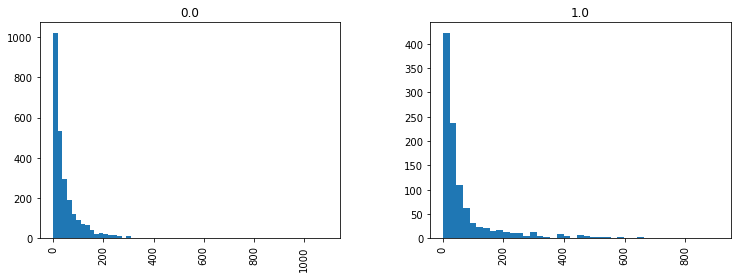

In [ ]:
clean_check.hist(column='words',by='Result',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [ ]:
spam = clean_check[clean_check.Result == 1].drop(['Result','nan','words'],axis=1)
ham = clean_check[clean_check.Result == 0].drop(['Result','nan','words'],axis=1)

In [ ]:
spam_val=spam.astype('float64').sum().values
ham_val=ham.astype('float64').sum().values
cols = clean_check.columns

df_hamwords  = pd.DataFrame(zip(cols, ham_val),  columns=['word', 'count'])
df_spamwords = pd.DataFrame(zip(cols, spam_val), columns=['word', 'count'])

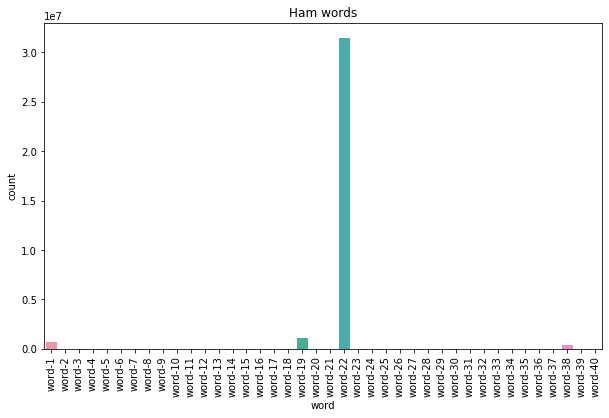

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_hamwords, ax=ax)
plt.title("Ham words")
plt.xticks(rotation='vertical');

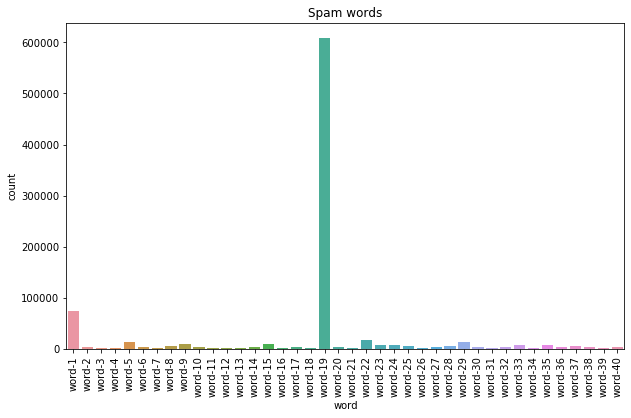

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords, ax=ax)
plt.title("Spam words")
plt.xticks(rotation='vertical');

In [ ]:
features = check.drop('Result',axis=1)
nan_cols = [i for i in features.columns if features[i].isnull().any()]
for col in nan_cols:
    features[col].fillna(features[col].median(), inplace=True)
features.isnull().sum()

word-1     0
word-2     0
word-3     0
word-4     0
word-5     0
word-6     0
word-7     0
word-8     0
word-9     0
word-10    0
word-11    0
word-12    0
word-13    0
word-14    0
word-15    0
word-16    0
word-17    0
word-18    0
word-19    0
word-20    0
word-21    0
word-22    0
word-23    0
word-24    0
word-25    0
word-26    0
word-27    0
word-28    0
word-29    0
word-30    0
word-31    0
word-32    0
word-33    0
word-34    0
word-35    0
word-36    0
word-37    0
word-38    0
word-39    0
word-40    0
nan        0
words      0
dtype: int64

In [ ]:
for col in features.columns:
    combined_df[col] = features[col]

In [ ]:
combined_df.drop('nan', axis=1, inplace=True)

combined_df.drop(combined_df['words'].idxmax(), inplace=True)

combined_df.dropna(axis=0, thresh=10, inplace=True)

In [ ]:
combined_df['nonzeros'] = combined_df.drop(['Result','zee','words'],axis=1).astype(bool).sum(axis=1)
combined_df

,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,...,word-35,word-36,word-37,word-38,word-39,word-40,Result,zee,words,nonzeros
id,,,,,,,,,,,,,,,,,,,,,
1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,1,...,0,0.0,0.0,0,0,0,0.0,train,1.0,22
2,117,1.0,4.0,3.0,5,5.0,2.0,9,19,6,...,15,3.0,1.0,13,3,1,0.0,train,98.0,38
3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,1,...,1,1.0,0.0,0,0,0,0.0,train,42.0,38
4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,0,...,0,0.0,0.0,1,0,0,0.0,train,3.0,22
5,263,6.0,8.0,8.0,5,26.0,1.0,21,35,10,...,49,26.0,24.0,23,4,24,1.0,train,310.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,1,0.0,0.0,0.0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0,0,0,NaN,test,3.0,5
5169,85,0.0,1.0,4.0,19,3.0,1.0,16,4,1,...,5,9.0,1.0,0,0,5,NaN,test,77.0,32
5170,80,5.0,0.0,4.0,23,11.0,2.0,6,10,5,...,5,5.0,3.0,1,3,5,NaN,test,72.0,32


In [ ]:
from sklearn.model_selection import train_test_split

feat = combined_df.query("zee == 'train'").drop(['Result', 'zee'], axis=1).values

features = ['word-1','word-19','word-22','words','nonzeros']
res = combined_df.query("zee == 'train'")['Result'].values

X_model, X_valid, y_model, y_valid = train_test_split(feat, res, test_size=0.3, random_state=5)

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
scaler = MinMaxScaler()
norm = Normalizer()
qt = QuantileTransformer(output_distribution='uniform')
pt = PowerTransformer(method='yeo-johnson')

X_model_sc = scaler.fit_transform(X_model)
X_valid_sc  = scaler.transform(X_valid)

X_model_pt = pt.fit_transform(X_model)
X_valid_pt  = pt.transform(X_valid)

X_model_nm = norm.fit_transform(X_model)
X_valid_nm  = norm.transform(X_valid)

X_model_qt = qt.fit_transform(X_model)
X_valid_qt  = qt.transform(X_valid)

In [ ]:
from collections import Counter

In [ ]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_model))
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_model_nm, y_model)
print('Resampled dataset shape %s' % Counter(y_ros))

Using TensorFlow backend.


Original dataset shape Counter({0.0: 1798, 1.0: 735})
Resampled dataset shape Counter({0.0: 1798, 1.0: 1798})


In [ ]:
from imblearn.combine import SMOTETomek

print('Original dataset shape %s' % Counter(y_model))
smt = SMOTETomek(sampling_strategy='auto')

X_smt, y_smt = smt.fit_sample(X_model_nm, y_model)
print('Resampled dataset shape %s' % Counter(y_smt))

Original dataset shape Counter({0.0: 1798, 1.0: 735})
Resampled dataset shape Counter({0.0: 1792, 1.0: 1792})


In [ ]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

def xgb_cv(kf, X, y):
    clf_xgb = XGBClassifier(objective = 'binary:logistic')
    
    param_dist = {'n_estimators': stats.randint(150, 500),
                  'learning_rate': stats.uniform(0.01, 0.07),
                  'subsample': stats.uniform(0.3, 0.7),
                  'max_depth': [3, 4, 5, 6, 7, 8, 9],
                  'colsample_bytree': stats.uniform(0.5, 0.45),
                  'min_child_weight': [1, 2, 3]
                 }
    clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'precision', error_score = 0, verbose = 3, n_jobs = -1)

    numFolds = kf
    folds = KFold(n_splits = numFolds, shuffle = True)

    estimators = []
    results = np.zeros(len(X))
    acc = 0
    f1 = 0
    for train_index, test_index in folds.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index].ravel(), y[test_index].ravel()
        clf.fit(X_train, y_train)

        estimators.append(clf.best_estimator_)
        results[test_index] = clf.predict(X_test)
        current_acc = accuracy_score(y_test, results[test_index])
        current_f1 = f1_score(y_test, results[test_index])
        print("current_acc:",current_acc)
        print("current_f1:",current_f1)
        acc += current_acc
        f1 += current_f1
        
        conf_mat = confusion_matrix(y_true=y_test, y_pred=results[test_index])
        print('Confusion matrix:\n', conf_mat)
    print("Accuracy CV ", acc/5)
    print("F1 CV ", f1/5)
    return clf

In [ ]:
def xgb_cv_grid(X, y):
    clf_xgb = XGBClassifier(objective = 'binary:logistic')    

    parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'seed': [1337]}

    clf = GridSearchCV(clf_xgb, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='precision',
                   verbose=2, refit=True)
    
    clf.fit(X, y)

    #trust your CV!
    best_parameters = pd.DataFrame(clf.cv_results_)
    
    print(best_parameters)
    return clf

In [ ]:
print("RandomOverSampler")
ros_model = xgb_cv_grid(X_ros, y_ros)

RandomOverSampler
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   26.7s remaining:   40.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   27.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   27.8s finished


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      24.553137      0.700303          0.04383        0.019551   

  param_colsample_bytree param_learning_rate param_max_depth  \
0                    0.7                0.05               6   

  param_min_child_weight param_n_estimators param_nthread  ...  \
0                     11               1000             4  ...   

  param_subsample                                             params  \
0             0.8  {'colsample_bytree': 0.7, 'learning_rate': 0.0...   

  split0_test_score split1_test_score split2_test_score  split3_test_score  \
0          0.938172          0.905371          0.907216           0.923885   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.928947         0.920718        0.012651                1  

[1 rows x 23 columns]


In [ ]:
print("SMOTE+Tomek")
smt_model = xgb_cv_grid(X_smt, y_smt)

SMOTE+Tomek
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   24.4s remaining:   36.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   25.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   25.0s finished


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      24.485743      0.339266         0.040785         0.01524   

  param_colsample_bytree param_learning_rate param_max_depth  \
0                    0.7                0.05               6   

  param_min_child_weight param_n_estimators param_nthread  ...  \
0                     11               1000             4  ...   

  param_subsample                                             params  \
0             0.8  {'colsample_bytree': 0.7, 'learning_rate': 0.0...   

  split0_test_score split1_test_score split2_test_score  split3_test_score  \
0          0.930939          0.918699          0.915301           0.927027   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.913747         0.921143        0.006714                1  

[1 rows x 23 columns]


Accuracy: 0.9023941068139963
Confusion matrix:
 [[717  58]
 [ 48 263]]


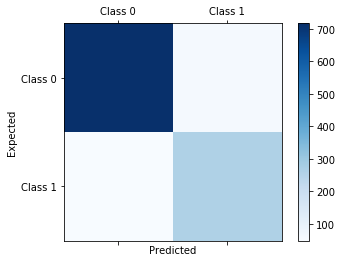

In [ ]:
from sklearn.metrics import confusion_matrix

pred_ros = ros_model.predict(X_valid_nm)
print("Accuracy:",accuracy_score(pred_ros,y_valid))
conf_mat = confusion_matrix(y_true=y_valid, y_pred=pred_ros)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Accuracy: 0.8977900552486188
Confusion matrix:
 [[716  59]
 [ 52 259]]


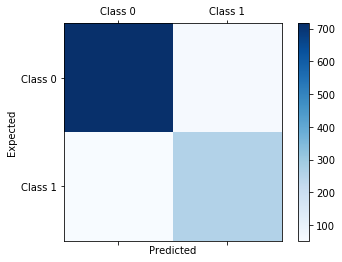

In [ ]:
from sklearn.metrics import confusion_matrix

pred_smt = smt_model.predict(X_valid_nm)
print("Accuracy:",accuracy_score(pred_smt,y_valid))
conf_mat = confusion_matrix(y_true=y_valid, y_pred=pred_smt)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
all_pred_smt = smt_model.predict(norm.transform(feat))
print("Accuracy:",accuracy_score(all_pred_smt,res))
conf_mat = confusion_matrix(y_true=res, y_pred=all_pred_smt)
print('Confusion matrix:\n', conf_mat)

Accuracy: 0.9662890301188174
Confusion matrix:
 [[2506   67]
 [  55  991]]


In [ ]:
all_pred_ros = ros_model.predict(norm.transform(feat))
print("Accuracy:",accuracy_score(all_pred_ros,res))
conf_mat = confusion_matrix(y_true=res, y_pred=all_pred_ros)
print('Confusion matrix:\n', conf_mat)

Accuracy: 0.9693285437966289
Confusion matrix:
 [[2510   63]
 [  48  998]]


In [ ]:
Z = combined_df.query("zee == 'test'").drop(['Result', 'zee'], axis=1).values
smt_prediction = smt_model.predict(norm.transform(Z))

In [ ]:
Z = combined_df.query("zee == 'test'").drop(['Result', 'zee'], axis=1).values
ros_prediction = ros_model.predict(norm.transform(Z))

In [ ]:
ros_sample_df = pd.read_csv("../input/datmin-joints-2020/sample_submission.csv")
ros_sample_df['Result'] = ros_prediction.astype(int)
ros_sample_df.sample(5, random_state=1)

,id,Result
941,4562,0
396,4017,0
1071,4692,1
1282,4903,0
491,4112,0


In [ ]:
smt_sample_df = pd.read_csv("../input/datmin-joints-2020/sample_submission.csv")
smt_sample_df['Result'] = smt_prediction.astype(int)
smt_sample_df.sample(5, random_state=1)

,id,Result
941,4562,0
396,4017,0
1071,4692,0
1282,4903,0
491,4112,0


In [ ]:
smt_sample_df.to_csv("smt_prediction.csv", index=False)